In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Load the dataset
df = pd.read_csv("Data Science Job Salaries.csv")

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 607 entries, 0 to 606
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Unnamed: 0          607 non-null    int64 
 1   work_year           607 non-null    int64 
 2   experience_level    607 non-null    object
 3   employment_type     607 non-null    object
 4   job_title           607 non-null    object
 5   salary              607 non-null    int64 
 6   salary_currency     607 non-null    object
 7   salary_in_usd       607 non-null    int64 
 8   employee_residence  607 non-null    object
 9   remote_ratio        607 non-null    int64 
 10  company_location    607 non-null    object
 11  company_size        607 non-null    object
dtypes: int64(5), object(7)
memory usage: 57.0+ KB


In [4]:
df.head()

,Unnamed: 0,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,0,2020,MI,FT,Data Scientist,70000,EUR,79833,DE,0,DE,L
1,1,2020,SE,FT,Machine Learning Scientist,260000,USD,260000,JP,0,JP,S
2,2,2020,SE,FT,Big Data Engineer,85000,GBP,109024,GB,50,GB,M
3,3,2020,MI,FT,Product Data Analyst,20000,USD,20000,HN,0,HN,S
4,4,2020,SE,FT,Machine Learning Engineer,150000,USD,150000,US,50,US,L


In [5]:
df.drop(columns=["Unnamed: 0"], inplace=True)

In [6]:
#Check for missing values
print(df.isnull().sum())

work_year             0
experience_level      0
employment_type       0
job_title             0
salary                0
salary_currency       0
salary_in_usd         0
employee_residence    0
remote_ratio          0
company_location      0
company_size          0
dtype: int64


In [7]:
# Verify unique values
print(df['job_title'].unique())

['Data Scientist' 'Machine Learning Scientist' 'Big Data Engineer'
 'Product Data Analyst' 'Machine Learning Engineer' 'Data Analyst'
 'Lead Data Scientist' 'Business Data Analyst' 'Lead Data Engineer'
 'Lead Data Analyst' 'Data Engineer' 'Data Science Consultant'
 'BI Data Analyst' 'Director of Data Science' 'Research Scientist'
 'Machine Learning Manager' 'Data Engineering Manager'
 'Machine Learning Infrastructure Engineer' 'ML Engineer' 'AI Scientist'
 'Computer Vision Engineer' 'Principal Data Scientist'
 'Data Science Manager' 'Head of Data' '3D Computer Vision Researcher'
 'Data Analytics Engineer' 'Applied Data Scientist'
 'Marketing Data Analyst' 'Cloud Data Engineer' 'Financial Data Analyst'
 'Computer Vision Software Engineer' 'Director of Data Engineering'
 'Data Science Engineer' 'Principal Data Engineer'
 'Machine Learning Developer' 'Applied Machine Learning Scientist'
 'Data Analytics Manager' 'Head of Data Science' 'Data Specialist'
 'Data Architect' 'Finance Data Anal

In [8]:
print(df['company_size'].unique())

['L' 'S' 'M']


In [9]:
print(df['experience_level'].unique())

['MI' 'SE' 'EN' 'EX']


In [10]:
print(df['employment_type'].unique())

['FT' 'CT' 'PT' 'FL']


In [11]:
#Feature Engineering
# Encode categorical variables
df['experience_level'] = df['experience_level'].map({'EN':
0, 'MI': 1, 'SE': 2, 'EX': 3})


In [12]:
df['employment_type'] = df['employment_type'].map({'PT': 0,
'FT': 1, 'CT': 2, 'FL': 3})

In [13]:
df.head()

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2020,1,1,Data Scientist,70000,EUR,79833,DE,0,DE,L
1,2020,2,1,Machine Learning Scientist,260000,USD,260000,JP,0,JP,S
2,2020,2,1,Big Data Engineer,85000,GBP,109024,GB,50,GB,M
3,2020,1,1,Product Data Analyst,20000,USD,20000,HN,0,HN,S
4,2020,2,1,Machine Learning Engineer,150000,USD,150000,US,50,US,L


In [14]:
# Add a salary ratio feature
df['salary_ratio'] = df['salary'] / df['salary_in_usd']

In [15]:
# Group salaries by company size
grouped_salary =df.groupby('company_size')['salary_in_usd'].mean()
print(grouped_salary)

company_size
L    119242.994949
M    116905.466258
S     77632.674699
Name: salary_in_usd, dtype: float64


In [16]:
# Group by job title and calculate average salary
top_jobs = df.groupby("job_title")["salary_in_usd"].mean().sort_values(ascending=False).head(10)
print(top_jobs)

job_title
Data Analytics Lead         405000.000000
Principal Data Engineer     328333.333333
Financial Data Analyst      275000.000000
Principal Data Scientist    215242.428571
Director of Data Science    195074.000000
Data Architect              177873.909091
Applied Data Scientist      175655.000000
Analytics Engineer          175000.000000
Data Specialist             165000.000000
Head of Data                160162.600000
Name: salary_in_usd, dtype: float64


In [17]:
#EDA

# Summary statistics
print(df.describe())

         work_year  experience_level  employment_type        salary  \
count   607.000000        607.000000       607.000000  6.070000e+02   
mean   2021.405272          1.401977         1.004942  3.240001e+05   
std       0.692133          0.785510         0.226121  1.544357e+06   
min    2020.000000          0.000000         0.000000  4.000000e+03   
25%    2021.000000          1.000000         1.000000  7.000000e+04   
50%    2022.000000          2.000000         1.000000  1.150000e+05   
75%    2022.000000          2.000000         1.000000  1.650000e+05   
max    2022.000000          3.000000         3.000000  3.040000e+07   

       salary_in_usd  remote_ratio  salary_ratio  
count     607.000000     607.00000    607.000000  
mean   112297.869852      70.92257      7.187409  
std     70957.259411      40.70913     38.927754  
min      2859.000000       0.00000      0.727026  
25%     62726.000000      50.00000      1.000000  
50%    101570.000000     100.00000      1.000000  
75%

In [32]:
# Salary distribution statistics
mean_salary = df["salary_in_usd"].mean()
median_salary = df["salary_in_usd"].median()
min_salary = df["salary_in_usd"].min()
max_salary = df["salary_in_usd"].max()

print(f"Mean salary: ${mean_salary:,.0f}")
print(f"Median salary: ${median_salary:,.0f}")
print(f"Minimum salary: ${min_salary:,.0f}")
print(f"Maximum salary: ${max_salary:,.0f}")

Mean salary: $112,298
Median salary: $101,570
Minimum salary: $2,859
Maximum salary: $600,000


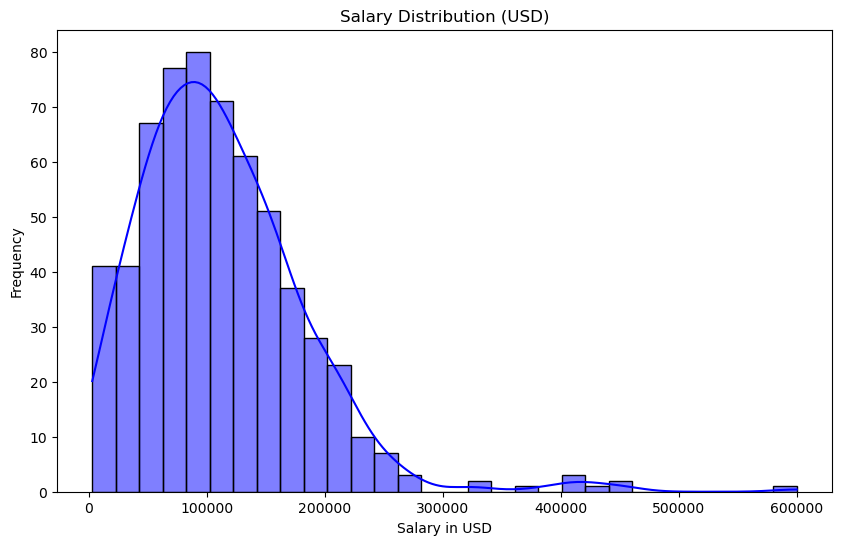

In [18]:
#Analyse salary distribution
plt.figure(figsize=(10, 6))
sns.histplot(df['salary_in_usd'], bins=30, kde=True,
color='blue')
plt.title('Salary Distribution (USD)')
plt.xlabel('Salary in USD')
plt.ylabel('Frequency')
plt.show()

C:\Users\Manasa\AppData\Local\Temp\ipykernel_4580\2619424771.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y=top_jobs.index, x=top_jobs.values, palette="rocket")


Text(0, 0.5, 'Job Title')

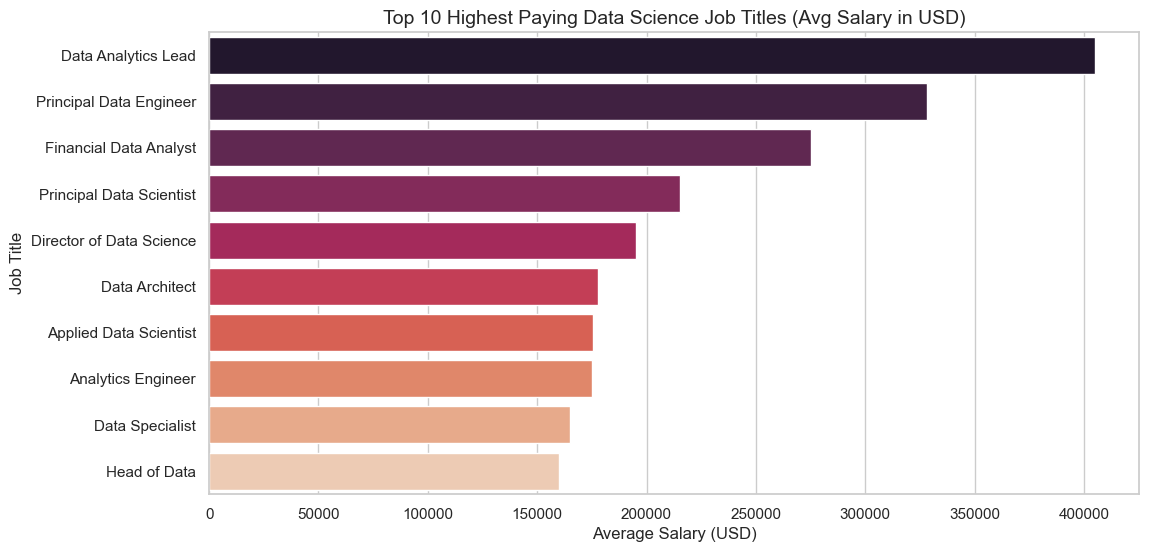

In [19]:
plt.figure(figsize=(12, 6))
sns.set(style="whitegrid")
sns.barplot(y=top_jobs.index, x=top_jobs.values, palette="rocket")
plt.title("Top 10 Highest Paying Data Science Job Titles (Avg Salary in USD)", fontsize=14)
plt.xlabel("Average Salary (USD)", fontsize=12)
plt.ylabel("Job Title", fontsize=12)


C:\Users\Manasa\AppData\Local\Temp\ipykernel_4580\726589132.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="employment_type", y="salary_in_usd", data=emp_type_salary, palette="Blues_r")


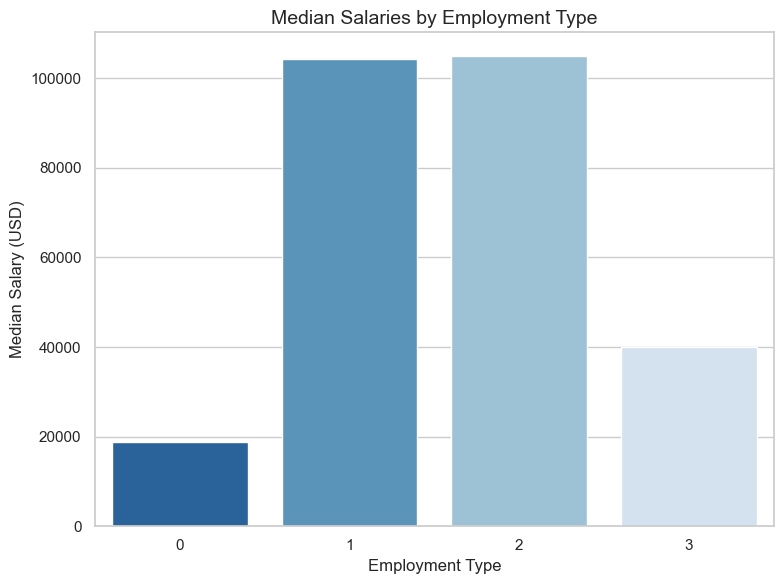

In [20]:
#Median Salaries by Employment Type
# Group and calculate median salaries
emp_type_salary = df.groupby("employment_type")["salary_in_usd"].median().reset_index()

# Plot
plt.figure(figsize=(8,6))
sns.barplot(x="employment_type", y="salary_in_usd", data=emp_type_salary, palette="Blues_r")
plt.title("Median Salaries by Employment Type", fontsize=14)
plt.xlabel("Employment Type")
plt.ylabel("Median Salary (USD)")
plt.tight_layout()
plt.show()

C:\Users\Manasa\AppData\Local\Temp\ipykernel_4580\1381682157.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="company_size", y="salary_in_usd", data=df, palette="Greens")


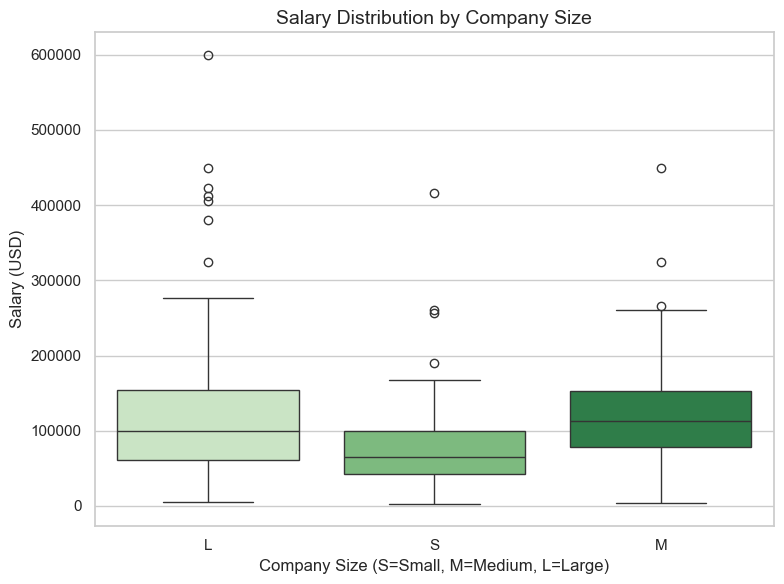

In [21]:
#Median Salaries by Company Size
# Plot
plt.figure(figsize=(8,6))
sns.boxplot(x="company_size", y="salary_in_usd", data=df, palette="Greens")
plt.title("Salary Distribution by Company Size", fontsize=14)
plt.xlabel("Company Size (S=Small, M=Medium, L=Large)")
plt.ylabel("Salary (USD)")
plt.tight_layout()
plt.show()

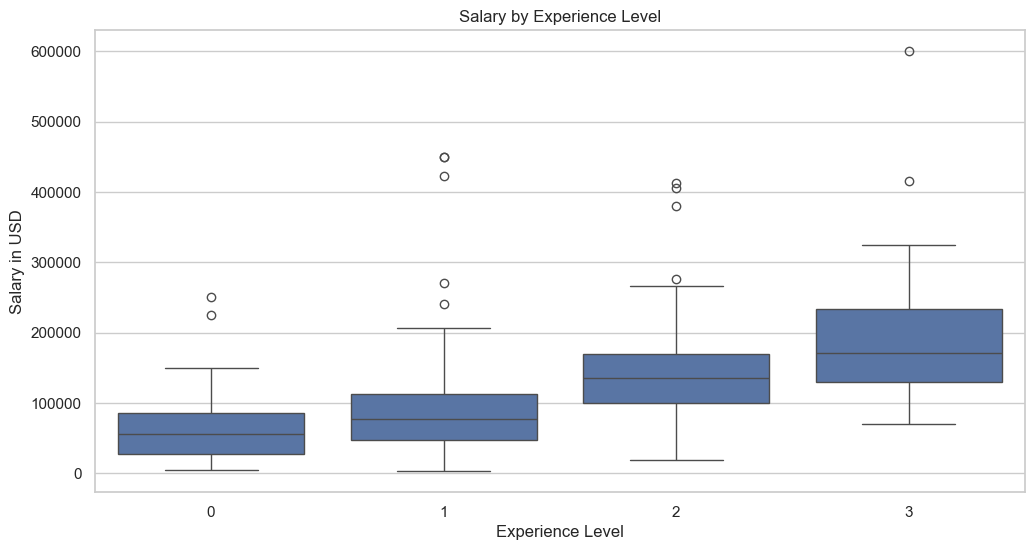

In [22]:
# Boxplot for salaries by experience level
plt.figure(figsize=(12, 6))
sns.boxplot(x='experience_level', y='salary_in_usd', data=df)
plt.title('Salary by Experience Level')
plt.xlabel('Experience Level')
plt.ylabel('Salary in USD')
plt.show()

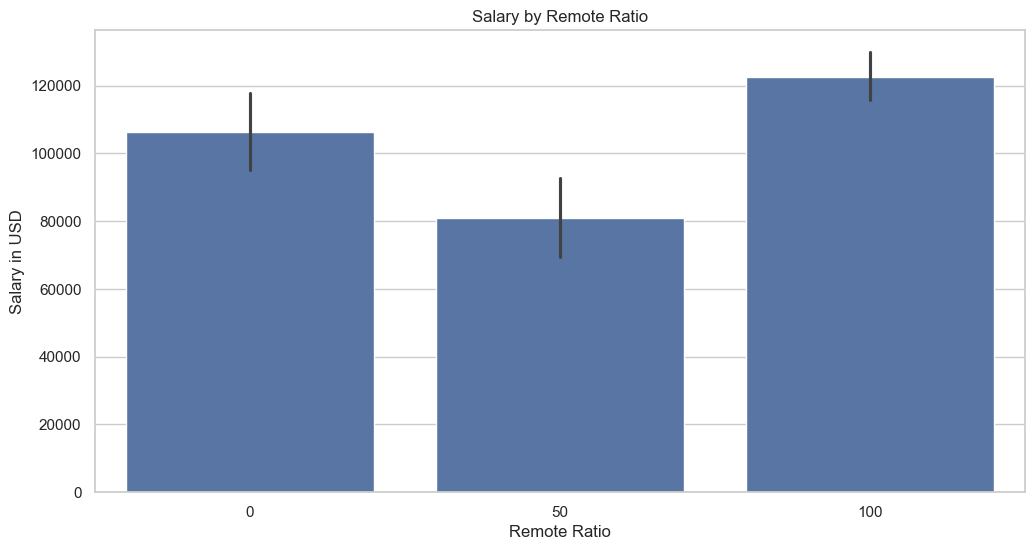

In [23]:
# Remote ratio vs salary
plt.figure(figsize=(12, 6))
sns.barplot(x='remote_ratio', y='salary_in_usd', data=df)
plt.title('Salary by Remote Ratio')
plt.xlabel('Remote Ratio')
plt.ylabel('Salary in USD')
plt.show()

In [25]:
#Financial Modeling
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_squared_error


In [26]:
# Select features and target
features = ['experience_level', 'employment_type',
'remote_ratio', 'company_size']
target = 'salary_in_usd'

In [27]:
X = df.drop(columns=["salary_in_usd", "salary", "salary_currency"])
y = df["salary_in_usd"]


In [28]:
# Identify categorical columns
categorical_cols = X.select_dtypes(include="object").columns.tolist()

# Define column transformer for encoding
preprocessor = ColumnTransformer([
    ("cat", OneHotEncoder(handle_unknown='ignore'), categorical_cols)
], remainder='passthrough')  # numeric columns stay unchanged

# Create pipeline with preprocessing + linear regression
model = Pipeline(steps=[
    ("preprocessor", preprocessor),
    ("regressor", LinearRegression())
])

In [29]:
#Split data
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.2, random_state=42)

In [30]:
# Train model
model.fit(X_train, y_train)

C:\Users\Manasa\anaconda3\Lib\site-packages\sklearn\compose\_column_transformer.py:1623: FutureWarning:


The format of the columns of the 'remainder' transformer in ColumnTransformer.transformers_ will change in version 1.7 to match the format of the other transformers.
At the moment the remainder columns are stored as indices (of type int). With the same ColumnTransformer configuration, in the future they will be stored as column names (of type str).
To use the new behavior now and suppress this warning, use ColumnTransformer(force_int_remainder_cols=False).




Pipeline(steps=[('preprocessor',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('cat',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  ['job_title',
                                                   'employee_residence',
                                                   'company_location',
                                                   'company_size'])])),
                ('regressor', LinearRegression())])

In [31]:
# Predict and evaluate
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)

Mean Squared Error: 5356012602.210355
